In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, glob

In [2]:
# wind_path = "../railsplitterHistories/*Histories_*.csv"
# solar_path = "../solarHistories/*Histories_*.csv"
solar_path = "../raven_solar/*Histories_*.csv"

solarfiles = glob.glob(solar_path, recursive=True)
solarfiles.sort()
# windfiles = glob.glob(wind_path, recursive=True)
# windfiles.sort()

In [3]:
solarfiles

['../raven_solar/solarHistories_0.csv',
 '../raven_solar/solarHistories_1.csv',
 '../raven_solar/solarHistories_2.csv',
 '../raven_solar/solarHistories_3.csv',
 '../raven_solar/solarHistories_4.csv',
 '../raven_solar/solarHistories_5.csv',
 '../raven_solar/solarHistories_6.csv',
 '../raven_solar/solarHistories_7.csv',
 '../raven_solar/solarHistories_8.csv',
 '../raven_solar/solarHistories_9.csv']

In [4]:
yearhours = pd.date_range(start='2019', end='2020', freq='H')[:8760]
yearhours

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

In [5]:
df = pd.read_csv(solarfiles[5])
df['year'] = yearhours
df

,time,kw,year
0,0.0,0.0,2019-01-01 00:00:00
1,1.0,0.0,2019-01-01 01:00:00
2,2.0,0.0,2019-01-01 02:00:00
3,3.0,0.0,2019-01-01 03:00:00
4,4.0,0.0,2019-01-01 04:00:00
...,...,...,...
8755,8755.0,0.0,2019-12-31 19:00:00
8756,8756.0,0.0,2019-12-31 20:00:00
8757,8757.0,0.0,2019-12-31 21:00:00
8758,8758.0,0.0,2019-12-31 22:00:00


In [6]:
# df = df.set_index('year').drop(columns=['time','power_norm'])
df = df.set_index('year').drop(columns=['time'])
df

,kw
year,
2019-01-01 00:00:00,0.0
2019-01-01 01:00:00,0.0
2019-01-01 02:00:00,0.0
2019-01-01 03:00:00,0.0
2019-01-01 04:00:00,0.0
...,...
2019-12-31 19:00:00,0.0
2019-12-31 20:00:00,0.0
2019-12-31 21:00:00,0.0


<AxesSubplot:xlabel='year'>

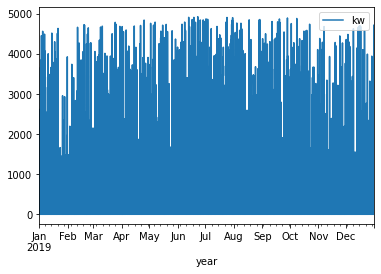

In [7]:
df.plot()

In [8]:
for file in solarfiles:
    df = pd.read_csv(file)
    df.drop(columns=['time'],inplace=True)
    df['time'] = yearhours
    df = df.set_index('time')
    print(df.describe())
    file = file.strip('.csv')
    save_name = "../"+file+"_pd.csv"
    df.to_csv(save_name)

                kw
count  8760.000000
mean    960.080685
std    1309.328955
min       0.000000
25%       0.000000
50%     101.999326
75%    1658.464148
max    4964.755170
                kw
count  8760.000000
mean    938.166308
std    1294.219252
min       0.000000
25%       0.000000
50%      76.344093
75%    1651.625518
max    4955.148772
                kw
count  8760.000000
mean    978.618921
std    1326.543883
min       0.000000
25%       0.000000
50%      96.648245
75%    1662.596882
max    4964.275648
                kw
count  8760.000000
mean    865.146159
std    1209.945265
min       0.000000
25%       0.000000
50%      72.583011
75%    1625.290484
max    4930.355799
                kw
count  8760.000000
mean    981.596088
std    1333.061801
min       0.000000
25%       0.000000
50%      85.618293
75%    1664.559970
max    4959.147494
                kw
count  8760.000000
mean    939.451687
std    1282.646573
min       0.000000
25%       0.000000
50%      80.876743
75%    1654.